In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# This method finds a csv file in the same directory as your notebook file, converts it into
# a Python dataframe, and preprocesses it (by removing any extra columns and by removing entries
# that are NaN for certain columns)
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

# This method returns back the percent of the total population that is incarcerated based on an
# inputted country. It does so by retrieving rows of a dataframe containing the necessary information.
def calculateIncarceratedPercent(df, country):
    df = df.loc[df["Country Name"] == country];
    return df["# of Prisoners"] / df["Total population"]

# This method plots a column of the dataframe as a bar graph
def plotColumn(df, column_name, title, xlabel, ylabel, filename):
    plt.style.use('ggplot')
    x = df["Country Name"]
    y = df[column_name]
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=60)
    plt.savefig(filename, bbox_inches='tight')

In [16]:
df = read_and_preprocess("incarceration_data.csv", [], [])
df

,Country Name,# of Prisoners,Total population
0,United States,2121600,329893959
1,India,466084,1380159707
2,China,1710000,1439404024
3,Indonesia,230755,273547739
4,Pakistan,77275,220920226
5,Nigeria,62781,206158244
6,Brazil,755274,212578788
7,Bangladesh,88084,164708057
8,Russia,501476,145934462
9,Mexico,198384,128944098


In [21]:
df["% Incarcerated"] = df["# of Prisoners"] / df["Total population"] * 100
df

,Country Name,# of Prisoners,Total population,% Incarcerated
0,United States,2121600,329893959,0.643116
1,India,466084,1380159707,0.033770
2,China,1710000,1439404024,0.118799
3,Indonesia,230755,273547739,0.084356
4,Pakistan,77275,220920226,0.034979
5,Nigeria,62781,206158244,0.030453
6,Brazil,755274,212578788,0.355291
7,Bangladesh,88084,164708057,0.053479
8,Russia,501476,145934462,0.343631
9,Mexico,198384,128944098,0.153853


In [22]:
# a quick check to make sure that the calculations above are correct
calculateIncarceratedPercent(df, "United States")

0    0.006431
dtype: float64

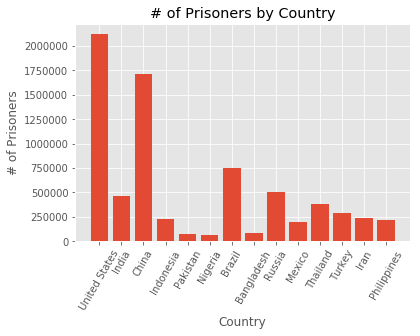

In [23]:
plotColumn(df, "# of Prisoners", "# of Prisoners by Country", "Country", "# of Prisoners", "priscount.png")

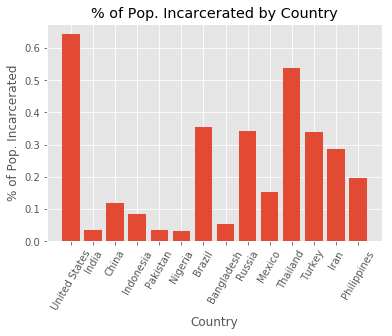

In [24]:
plotColumn(df, "% Incarcerated", "% of Pop. Incarcerated by Country", "Country", "% of Pop. Incarcerated", "pop%.png")